# K-Means Clustering Algorithm

In [46]:
#importing Libraries 

import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten , kmeans, vq
from sklearn.cluster import KMeans
import matplotlib.pyplot as mtp   
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

#Loading The PIMA Indian Diabetes dataset and Pre-Processing


In [2]:
df = pd.read_csv("diabetes.csv")
#df.head()

In [3]:
df.shape

(768, 9)

#Removing records with non-zero Insulin Attribute 

In [24]:
#df.drop(df[df['Insulin'] <= 0].index, inplace = True)
df.drop(df[df['Insulin'] > 0].index, inplace = True) # DROPPING INSULUN GRETER THAN 0

#Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [26]:
#df.info()

In [27]:
df.head(374)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


#Count of Diabetic and Non- Diabetic patient from remaining data to check wheter the dataset is balanced or not 

In [29]:
count=df.Outcome.value_counts()
print(count)

0    236
1    138
Name: Outcome, dtype: int64


 #Finding Missing Value

In [32]:
df.isnull().sum()  

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#Dropping features one at a time with lowest correlation to check if it affects accuracy

In [33]:
x =df[['Pregnancies','Glucose','BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','Age']]
#x = df[['Pregnancies','Glucose','SkinThickness','BMI','DiabetesPedigreeFunction','Age']] # drop BP
#x = df[['Pregnancies','Glucose','BloodPressure','BMI','DiabetesPedigreeFunction','Age']] #SkinThickness drp
#x = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction',]] # Age drp
#x = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','BMI','Age']] #'DiabetesPedigreeFunction' drp
#x = df[['Glucose','BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','Age']] # Pregnancies drp

y = df['Outcome']

#Dividing the dataset into training and testing 

In [34]:
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 0 , shuffle = False)

#Elbow method to check the no of clusters

C:\Users\Diksh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


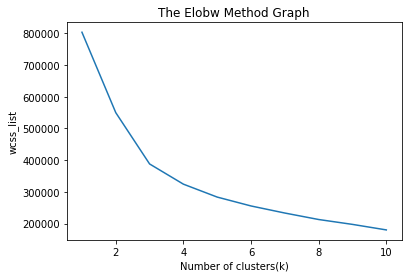

In [35]:
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 11), wcss_list)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()

#Forming cluster of 2 for Training set 

In [48]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(x_train)

predicted_labels = kmeans.labels_

right_labels = sum (y_train == predicted_labels )

print('Train Accuracy score: {0:0.2f}'. format(right_labels/float(y_train.size)))

Train Accuracy score: 0.71


#Forming cluster of 2 for Testing set

In [40]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(x_test)

predicted_labels = kmeans.labels_

right_labels = sum (y_test == predicted_labels )

print('Test Accuracy score: {0:0.2f}'. format(right_labels/float(y_test.size)))

Test Accuracy score: 0.29


In [45]:
# confusion Matrix for K- Means 

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,predicted_labels)

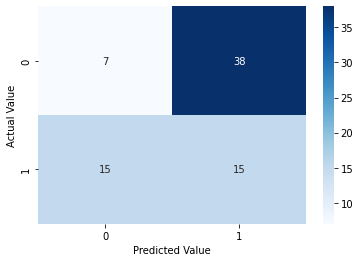

In [47]:
# Confusion Matrix

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,predicted_labels,labels = [0,1])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()

In [42]:
# calculating recall

recall =  recall_score(y_test, predicted_labels)
print(f"Recall score is :{recall}")

Recall score is :0.5


In [43]:
# calculating Precision

precision =  precision_score(y_test, predicted_labels)
print(f"Precision score is :{precision}")

Precision score is :0.2830188679245283


In [44]:
# calculating F1 Score

f1_score = 2 * (precision * recall) / (precision + recall)
print(f"F1 score is :{f1_score}")

F1 score is :0.3614457831325301
